ggsave: incorrect output when exporting markdown demo to PNG

https://github.com/JetBrains/lets-plot/issues/1362 [closed]

In [1]:
import numpy as np
import pandas as pd

from lets_plot import *
LetsPlot.setup_html()

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
print(df.shape)
df.head()

(234, 11)


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [3]:
p = (ggplot(df) 
    + geom_point(aes(x='displ', y='cty', color='drv'), size=8) 
    + scale_color_manual(['#66c2a5', '#fc8d62', '#8da0cb'], guide='none') 

    # Enable Markdown in all titles
    + theme(title=element_markdown()) 

    # Adjust style of title and subtitle
    + theme(plot_title=element_text(size=30, family='Georgia', hjust=0.5), 
            plot_subtitle=element_text(family='Georgia', hjust=0.5)) 

    + labs(

        # Span styling, mixing style and emphasis
        title=
            """<span style="color:#66c2a5">**Forward**</span>, """
            """<span style="color:#8da0cb">**Rear**</span> and """
            """<span style="color:#fc8d62">**4WD**</span> Drivetrain""",

        # Simple emphasis
        subtitle='**City milage** *vs* **displacement**', 

        # multiline caption, multiline style span, links 
        caption="<span style='color:grey'>"
                "Powered by <a href='https://lets-plot.org'>Lets-Plot</a>.  \n"
                "Visit the <a href='https://github.com/jetbrains/lets-plot/issues'>issue tracker</a> for feedback." 
                "</span>",

        # Axis titles
        x='Displacement (***inches***)',
        y='Miles per gallon (***cty***)'
    )
)
p

In [4]:
fullpath_png = ggsave(p, "md.png")

Fontconfig error: Cannot load default config file: No such file: (null)


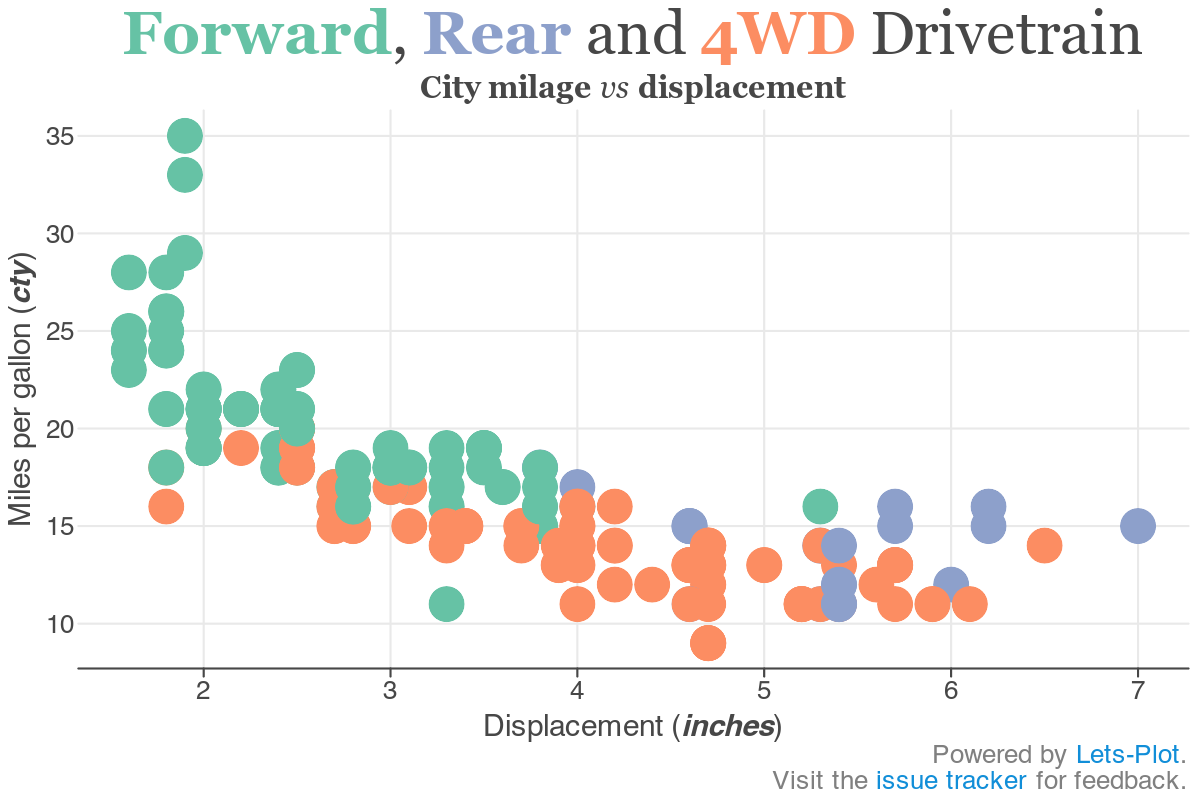

In [5]:
from IPython.display import Image

Image(filename=fullpath_png)